## Problem Explanation of the Given Markov Chain Model for Old Faithful Geyser

### Problem Breakdown

#### 1. The Old Faithful geyser eruptions are categorized into low (l) and high (h) based on their duration.
#### 2. The eruption behavior is modeled as a Markov Chain, where the next eruption depends on the previous two eruptions.
#### 3. The transition probabilities are given in a matrix form, describing how likely it is to move between states.

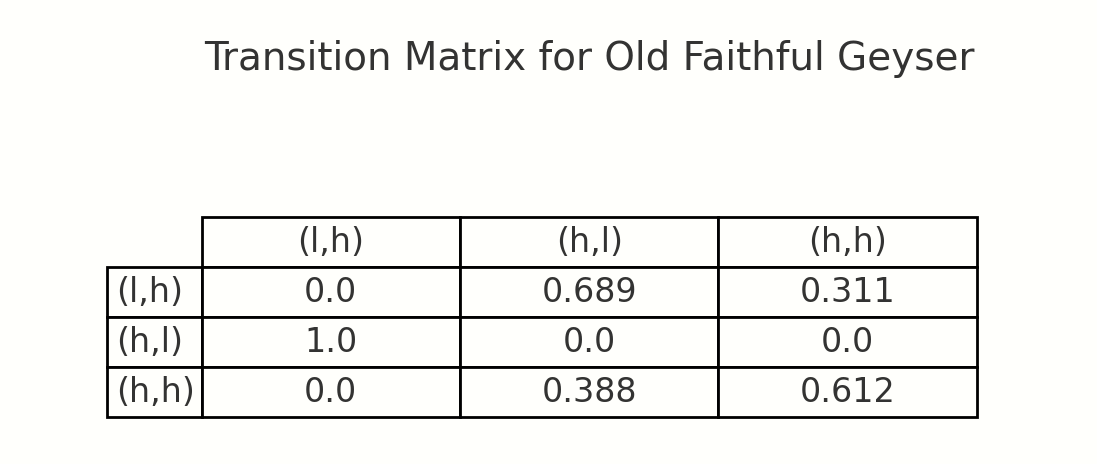

## Solution approach:

#### 1. **Defining the Transition Matrix:** The matrix tells us the probability of moving from one state to another.
#### 2. **Simulating the Markov Chain:** We started with an initial state and used random sampling to simulate 300 eruptions. At each step, the next state was chosen based on the probabilities in matrix P.
#### 3. **Computing the Steady-State Distribution:** We found the long-term probabilities of each state using eigenvalues and eigenvectors. 
#### 4. **Plotting the State Transitions:** A graph was generated showing how the eruption pattern changes over time.

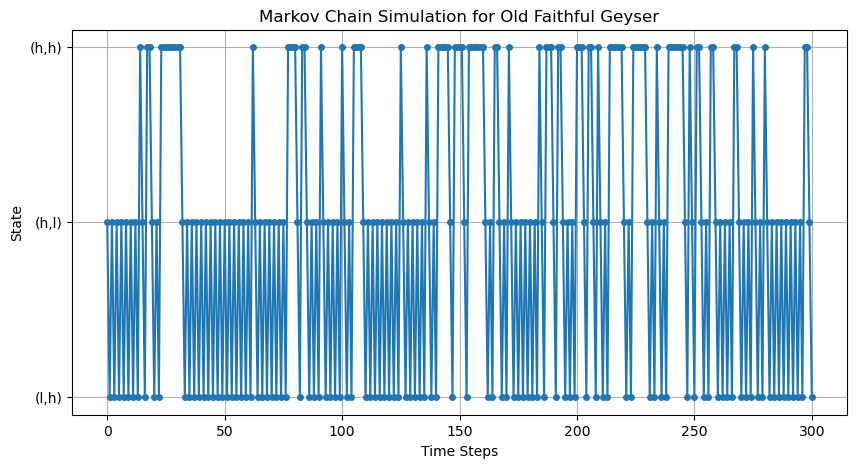

array([0.35694572, 0.35694572, 0.28610856])

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_markov_chain(P, initial_state, steps=100):
    """
    Simulates a second-order Markov Chain.
    """
    states = [initial_state]
    current_state = initial_state
    
    for _ in range(steps):
        next_state = np.random.choice([0, 1, 2], p=P[current_state])
        states.append(next_state)
        current_state = next_state
    
    return states

# Transition Matrix (from given image)
P = np.array([
    [0, 0.689, 0.311],
    [1, 0, 0],
    [0, 0.388, 0.612]
])

# Initial state (let's start from state (h,l), i.e., index 1)
initial_state = 1
steps = 300

# Simulate the Markov Chain
simulated_states = simulate_markov_chain(P, initial_state, steps)

# Compute steady-state probabilities (eigenvector approach)
eigenvalues, eigenvectors = np.linalg.eig(P.T)
steady_state = np.real(eigenvectors[:, np.isclose(eigenvalues, 1)]).flatten()
steady_state /= np.sum(steady_state)  # Normalize

# Plot the simulated states
time_steps = np.arange(len(simulated_states))
plt.figure(figsize=(10, 5))
plt.plot(time_steps, simulated_states, marker='o', linestyle='-', markersize=4)
plt.yticks([0, 1, 2], labels=['(l,h)', '(h,l)', '(h,h)'])
plt.xlabel('Time Steps')
plt.ylabel('State')
plt.title('Markov Chain Simulation for Old Faithful Geyser')
plt.grid(True)
plt.show()

# Output steady-state probabilities
steady_state

### Interpretation of the Above Graph:

#### The graph represents the simulated state transitions of the Old Faithful geyser's eruptions over 300 time steps, based on the given second-order Markov model.

### Key Observations:

#### 1. Frequent Transitions Between (l,h) and (h,l) where the probability of moving from (h,l) to (l,h) is 1, causing deterministic alternation.
#### 2. Less Frequent Transitions to (h,h) because the probability of transitioning from (h,h) to (h,h) is 0.612, meaning it tends to persist for a while once entered.
#### 3. The system spends longer durations in certain states before switching. This happens due to the high probability of self-transition in certain cases.

### Understanding the Steady-State Probabilities:

#### At the bottom of the image, we see an array. This represents the steady-state probabilities for each state:

####  - P(l,h)=0.357P(l,h)=0.357 (about 35.7% of the time spent here)
####  - P(h,l)=0.357P(h,l)=0.357 (about 35.7% of the time spent here)
####  - P(h,h)=0.286P(h,h)=0.286 (about 28.6% of the time spent here)

#### What this means:

####  - The geyser most frequently alternates between (l,h) and (h,l).
####  - The least common state is (h,h), but it still appears a significant fraction of the time.